In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
import os

# Results

In [2]:
main_root = os.getcwd()

In [3]:
root = main_root + '\\GeneSets\\TransferredLinksPPI\\2StepKernel_20genes\\Results'

In [4]:
samples = len(os.listdir(root))

In [5]:
result_example = root + '\\model_gset_set_0\\all\\f1.tab'

with open(result_example, 'r') as result:
    antibiotics = []
    for line in result:
        antibiotics.append(line.split('\t')[0])

results = pd.DataFrame(index = antibiotics, columns = range(samples))

In [6]:
for i in range(samples):
    result_file = root + f'\\model_gset_set_{i}\\all\\f1.tab'
    with open(result_file, 'r') as result:
        for line in result:
            values = line.split('\t')
            results.loc[values[0]][i] = np.around(float(values[1]), decimals = 3)

In [7]:
random_results = results.drop(0 , axis=1)

In [8]:
random_results.T

,ALL,AMP,AUG,AXO,CHL,FIS,FOX,GEN,KAN,STR,TET,TIO
1,0.76,0.729,0.8,0.775,0.617,0.734,0.773,0.625,0.607,0.706,0.73,0.808
2,0.75,0.717,0.764,0.794,0.56,0.748,0.741,0.636,0.566,0.72,0.758,0.778
3,0.743,0.704,0.75,0.731,0.588,0.777,0.724,0.61,0.588,0.736,0.75,0.763
4,0.732,0.694,0.736,0.74,0.563,0.763,0.725,0.613,0.628,0.729,0.737,0.731
5,0.747,0.748,0.756,0.749,0.61,0.75,0.739,0.63,0.568,0.704,0.736,0.743
6,0.747,0.705,0.758,0.772,0.594,0.735,0.76,0.651,0.618,0.728,0.724,0.777
7,0.744,0.749,0.762,0.758,0.475,0.782,0.73,0.654,0.638,0.707,0.783,0.766
8,0.761,0.751,0.76,0.771,0.569,0.787,0.74,0.671,0.586,0.754,0.762,0.773
9,0.751,0.717,0.756,0.761,0.64,0.77,0.739,0.615,0.542,0.707,0.753,0.757
10,0.751,0.748,0.765,0.749,0.604,0.771,0.73,0.632,0.587,0.723,0.743,0.749


In [ ]:
hist_30randomizations_20genes_transferredppi_1step

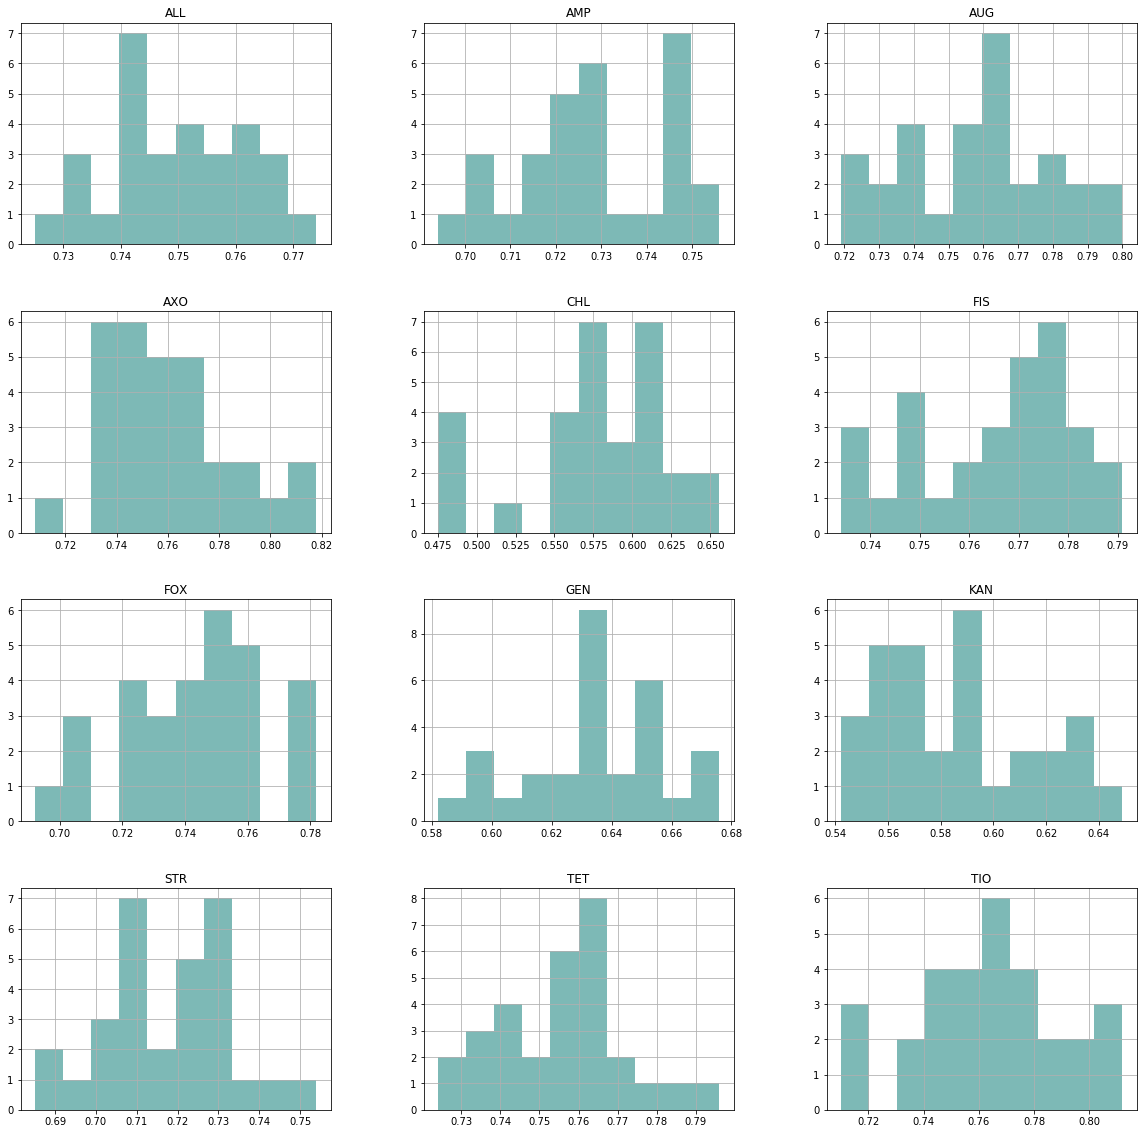

In [15]:
fig = random_results.astype(float).T.hist(figsize = (20, 20), color = '#7DB9B6')

In [10]:
df = pd.concat([results[0], results.mean(axis = 1), results.std(axis = 1)], axis = 1)
df.columns = ['F1 highest kernel', 'Mean F1 - random', 'Std F1 - random']

In [11]:
df

,F1 highest kernel,Mean F1 - random,Std F1 - random
ALL,0.728,0.749097,0.012807
AMP,0.709,0.727548,0.016599
AUG,0.74,0.758194,0.021583
AXO,0.766,0.760355,0.024824
CHL,0.531,0.574839,0.047242
FIS,0.728,0.764097,0.017184
FOX,0.737,0.741968,0.022120
GEN,0.594,0.633000,0.024346
KAN,0.576,0.585065,0.028431
STR,0.736,0.717871,0.015983


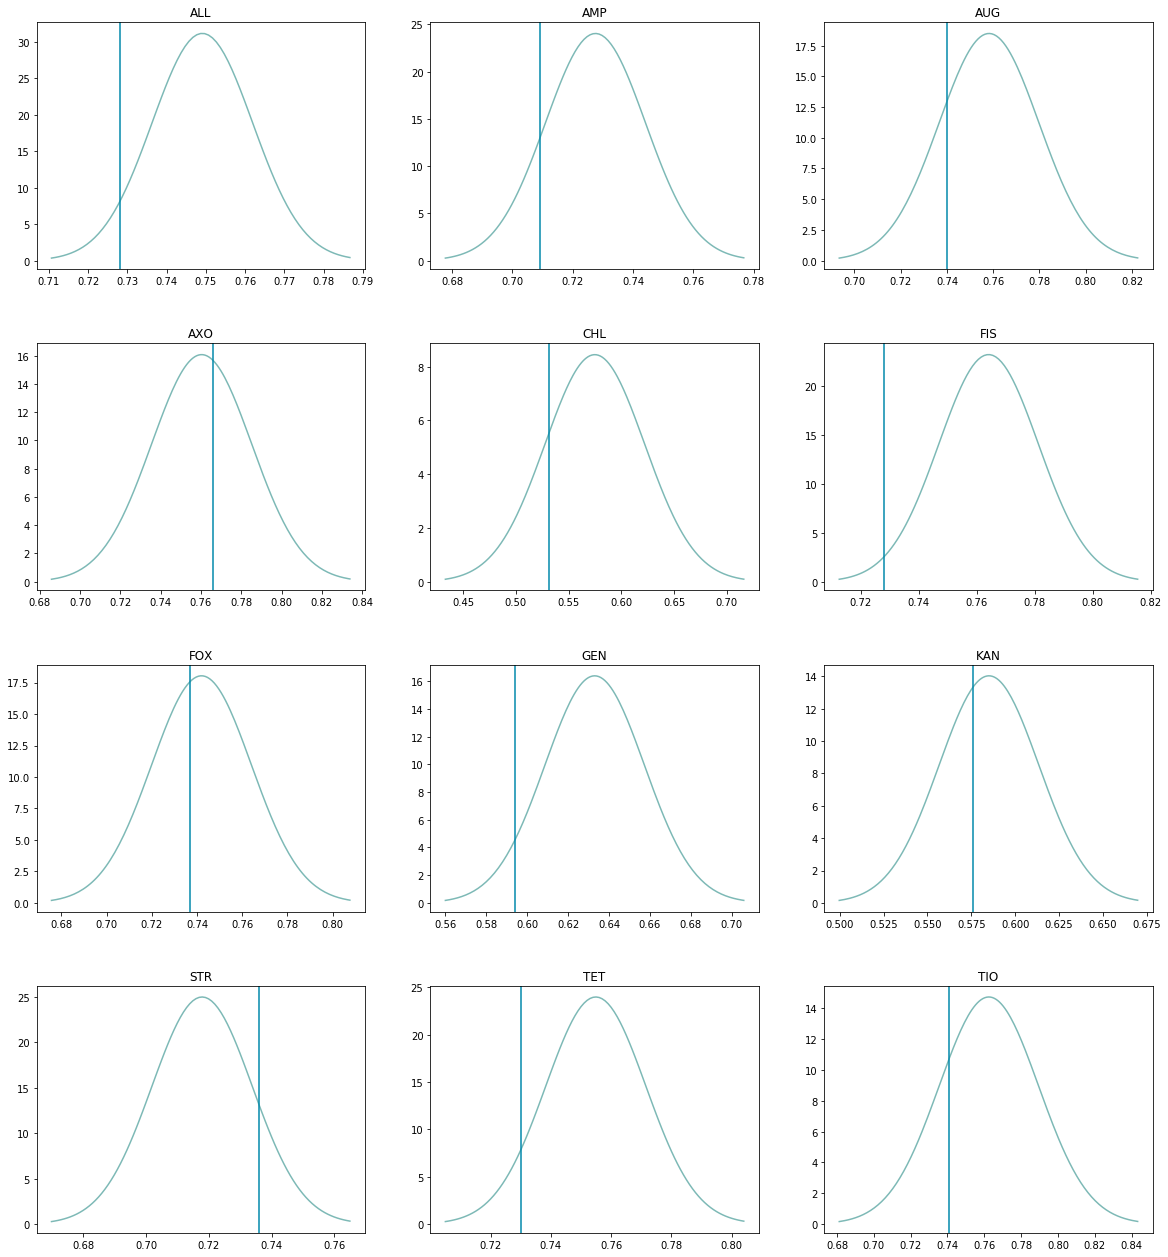

In [14]:
figure, axis = plt.subplots(nrows=4, ncols=3, figsize=(20, 17))


for row in range(4):
    for col in range(3):
        axis[row, col].set_title(antibiotics[3*row+col])
        line = 3*row+col
        value = df['F1 highest kernel'][line]
        m = df['Mean F1 - random'][line]
        s = df['Std F1 - random'][line]
        x_axis =(np.arange(m - 3*s, m + 3*s, 0.001))
        axis[row, col].plot(x_axis, norm.pdf(x_axis, m, s), color = '#7DB9B6')
        axis[row, col].axvline(x = value, color = '#0088aa', label = 'axvline - full height')
        axis[row, col].set_title(antibiotics[3*row+col])

        
plt.subplots_adjust(top = 0.999, bottom=0.01, hspace=0.3, wspace=0.2)